# **Trabajo 4 Técnicas en Aprendizaje Estadístico**

## Predicción del número de vehículos registrados diariamente en el Registro Único Nacional de Tránsito

**Realizado por: Alejandro Ortiz Mejía**

Para más detalles acerca del procedimiento en este notebook, consulte https://aljeandro.github.io/trabajo4-TAE/

Importar todas las librerías necesarias.

In [1]:
!pip install darts

     |████████████████████████████████| 238 kB 7.3 MB/s 
     |████████████████████████████████| 787 kB 56.5 MB/s 
     |████████████████████████████████| 804.1 MB 2.4 kB/s 
     |████████████████████████████████| 1.5 MB 46.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 9.9 MB 18.6 MB/s 
     |████████████████████████████████| 65 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 19.6 MB/s 
     |████████████████████████████████| 28.5 MB 51 kB/s 
     |████████████████████████████████| 22.3 MB 33 kB/s 
     |████████████████████████████████| 177 kB 50.5 MB/s 
     |████████████████████████████████| 142 kB 59.6 MB/s 
     |████████████████████████████████| 10.3 MB 11.0 MB/s 
     |████████████████████████████████| 9.5 MB 76.2 MB/s 
     |████████████████████████████████| 370 kB 77.7 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 178 kB 61.9 MB/s 
  Created wheel for f

In [1]:
import datetime

from darts import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Cargar los datos

In [2]:
df_original = pd.read_csv("/content/drive/MyDrive/Universidad/Técnicas en aprendizaje estadístico/Trabajos/Trabajo 4/registros_autos_entrenamiento.csv", sep=";")

Crear una lista de los días festivos en Colombia desde el año 2012 hasta el 2018

In [3]:
holidays_df = pd.DataFrame({'date': [
                       '1/1/2012', 
                       '9/1/2012', 
                       '19/3/2012', 
                       '5/4/2012', 
                       '6/4/2012', 
                       '1/5/2012',
                       '21/5/2012',
                       '11/6/2012',
                       '18/6/2012',
                       '2/7/2012',
                       '20/7/2012',
                       '7/8/2012',
                       '20/8/2012',
                       '15/10/2012',
                       '5/11/2012',
                       '12/11/2012',
                       '8/12/2012',
                       '25/12/2012',
                       
                       '1/1/2013', 
                       '7/1/2013', 
                       '25/3/2013', 
                       '28/3/2013', 
                       '29/3/2013', 
                       '1/5/2013',
                       '13/5/2013',
                       '3/6/2013',
                       '10/6/2013',
                       '1/7/2013',
                       '20/7/2013',
                       '7/8/2013',
                       '19/8/2013',
                       '14/10/2013',
                       '4/11/2013',
                       '11/11/2013',
                       '8/12/2013',
                       '25/12/2013',
                       
                       '1/1/2014', 
                       '6/1/2014', 
                       '24/3/2014', 
                       '17/4/2014', 
                       '18/4/2014', 
                       '1/5/2014',
                       '2/6/2014',
                       '23/6/2014',
                       '30/6/2014',
                       '20/7/2014',
                       '7/8/2014',
                       '18/8/2014',
                       '13/10/2014',
                       '3/11/2014',
                       '17/11/2014',
                       '8/12/2014',
                       '25/12/2014',
                       
                       '1/1/2015', 
                       '12/1/2015', 
                       '23/3/2015', 
                       '2/4/2015', 
                       '3/4/2015', 
                       '1/5/2015',
                       '18/5/2015',
                       '8/6/2015',
                       '15/6/2015',
                       '29/6/2015',
                       '20/7/2015',
                       '7/8/2015',
                       '17/8/2015',
                       '12/10/2015',
                       '2/11/2015',
                       '16/11/2015',
                       '8/12/2015',
                       '25/12/2015',
                       
                       '1/1/2016', 
                       '11/1/2016', 
                       '21/3/2016', 
                       '24/3/2016', 
                       '25/3/2016', 
                       '1/5/2016',
                       '9/5/2016',
                       '30/5/2016',
                       '6/6/2016',
                       '4/7/2016',
                       '20/7/2016',
                       '7/8/2016',
                       '15/8/2016',
                       '17/10/2016',
                       '7/11/2016',
                       '14/11/2016',
                       '8/12/2016',
                       '25/12/2016',
                       
                       '1/1/2017', 
                       '9/1/2017', 
                       '20/3/2017', 
                       '13/4/2017', 
                       '14/4/2017', 
                       '1/5/2017',
                       '29/5/2017',
                       '19/6/2017',
                       '26/6/2017',
                       '3/7/2017',
                       '20/7/2017',
                       '7/8/2017',
                       '21/8/2017',
                       '16/10/2017',
                       '6/11/2017',
                       '13/11/2017',
                       '8/12/2017',
                       '25/12/2017',
                       
                       '1/1/2018', 
                       '8/1/2018', 
                       '19/3/2018', 
                       '29/3/2018', 
                       '30/3/2018', 
                       '1/5/2018',
                       '14/5/2018',
                       '4/6/2018',
                       '11/6/2018',
                       '2/7/2018',
                       '20/7/2018',
                       '7/8/2018',
                       '20/8/2018',
                       '15/10/2018',
                       '5/11/2018',
                       '12/11/2018',
                       '8/12/2018',
                       '25/12/2018']})

holidays_df['date'] = pd.to_datetime(holidays_df['date'])
holidays_list = holidays_df['date'].tolist()

Creación de funciones para la creación de variables derivadas y postprocesado.

In [4]:
""" 
Se crea una lista con objetos TimeStamp de Pandas que contienen las fechas 
de inicio de cada mes de los años desde el 2012 hasta el 2017, y a partir de 
esta se calculan las fechas del último día hábil del mes, y se guardan en la 
lista list_LBDM. 
"""
list_month_start =  pd.date_range(start='1/1/2012', periods=84, freq='MS').tolist()
list_LBDM = list(map(lambda date: date + pd.offsets.BMonthEnd(), list_month_start))


def negative_to_zero(num):
  if num < 0:
    return 0
  else:
    return num


def is_last_business_day_month(date):

  if date in list_LBDM:
    return 1
  else:
    return 0


def is_holiday(date):

  if date in holidays_list:
    return 1
  else:
    return 0



In [5]:
df_new_vars = df_original.copy()
df_new_vars['Fecha'] = pd.to_datetime(df_new_vars['Fecha'], format='%d/%m/%Y')

In [6]:
darts_series_original = TimeSeries.from_dataframe(df_original, 'Fecha', 'Unidades')

## **Creación de nuevas variables derivadas**

In [7]:
# df_new_vars corresponde al DataFrame con todos los datos del archivo original
# y además contiene las nuevas variables derivadas calculadas a partir de 
# la variable Fecha.

df_new_vars['Is_LBDM'] =  df_new_vars['Fecha'].to_frame().applymap(is_last_business_day_month)
df_new_vars['Is_holiday'] = df_new_vars['Fecha'].to_frame().applymap(is_holiday)
df_new_vars = df_new_vars.set_index('Fecha')
df_new_vars['day_of_week'] = df_new_vars.index.dayofweek
df_new_vars['day_of_month'] = df_new_vars.index.strftime('%d')
df_new_vars['month_of_year'] = df_new_vars.index.strftime('%m')
df_new_vars['timestamp'] = df_original['Fecha'].apply(
    lambda date: int(datetime.datetime(
        int(date.split('/')[2]),
        int(date.split('/')[1]),
        int(date.split('/')[0]))
    .timestamp())).tolist()

## **Análisis Descriptivo del conjunto de datos**

<AxesSubplot:xlabel='day_of_week'>

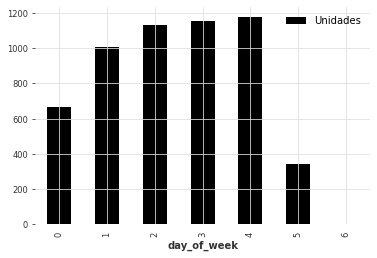

In [8]:
df_new_vars[['day_of_week', 'Unidades']].groupby(['day_of_week']).mean().plot(kind='bar')

<AxesSubplot:xlabel='day_of_month'>

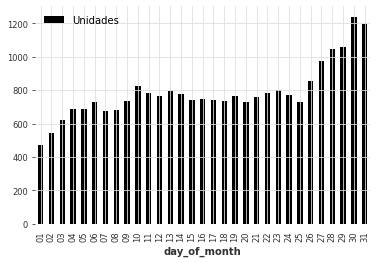

In [9]:
df_new_vars[['day_of_month', 'Unidades']].groupby('day_of_month').mean().plot(kind='bar')

<AxesSubplot:xlabel='month_of_year'>

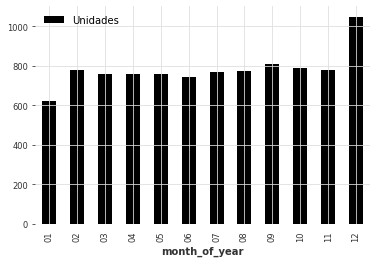

In [10]:
df_new_vars[['month_of_year', 'Unidades']].groupby('month_of_year').mean().plot(kind='bar')

## **Predicción 2017**

### **Entrenamiento**

In [11]:
y_train_2017 = df_new_vars.iloc[0:1827]['Unidades'].to_numpy()
X_train_2017 = df_new_vars.iloc[0:1827][['timestamp', 'day_of_week', 'day_of_month', 'month_of_year', 'Is_LBDM', 'Is_holiday']].to_numpy()

y_val_2017 = df_new_vars.iloc[1827:]['Unidades'].to_numpy()
X_val_2017 = df_new_vars.iloc[1827:][['timestamp', 'day_of_week', 'day_of_month', 'month_of_year', 'Is_LBDM', 'Is_holiday']].to_numpy()

scaler_2017 = StandardScaler()

X_train_scaled_2017 = scaler_2017.fit_transform(X_train_2017)
X_val_scaled_2017 = scaler_2017.transform(X_val_2017)

In [32]:
model_2017 = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation="relu", max_iter=2000, early_stopping=True).fit(X_train_scaled_2017, y_train_2017)

### **Predicción**

In [33]:
prediction_2017 = model_2017.predict(X_val_scaled_2017)

In [34]:
# DataFrame solo con las unidades predichas por el modelo
df_prediction_2017_unidades = pd.DataFrame(prediction_2017, columns=['Unidades'])
df_prediction_2017_unidades = df_prediction_2017_unidades.applymap(negative_to_zero)

df_prediction_2017 = pd.DataFrame(
    {
        "Fecha": df_original.iloc[1827:]['Fecha'].tolist(),
        "Prediccion": df_prediction_2017_unidades['Unidades'].tolist()
    }
)

#DataFrame con las unidades predichas y su respectiva fecha como índice
df_prediction_2017 = df_prediction_2017.set_index('Fecha')

### **Resultados**

**Gráfica**

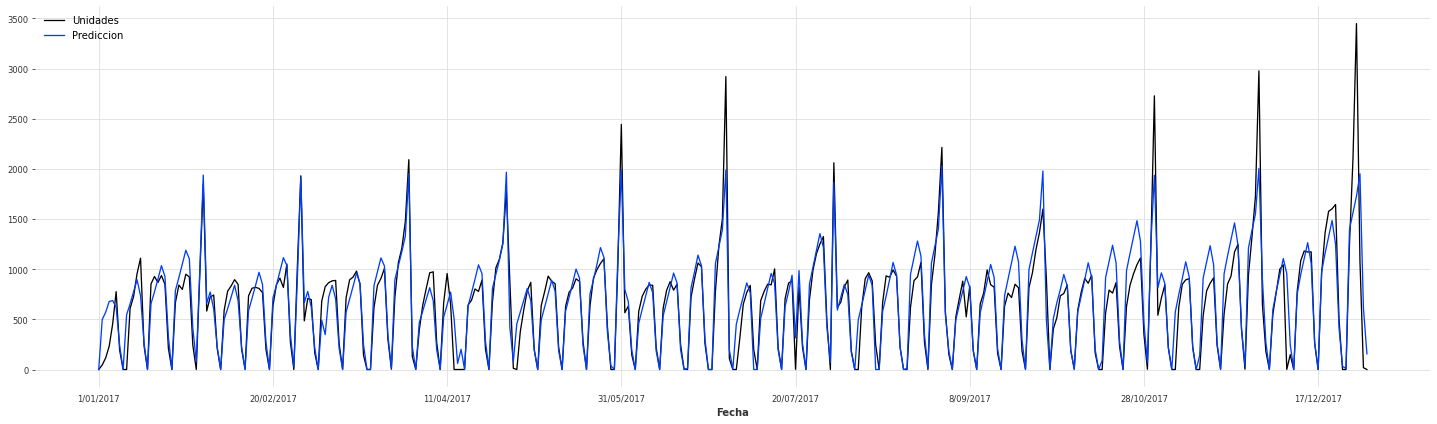

In [35]:
df_original_aux = df_original.set_index('Fecha')

fig, ax = plt.subplots(figsize=(25, 7))
df_original_aux.iloc[1827:].plot(ax=ax)
df_prediction_2017.plot(ax=ax, label='Predicción')
ax.legend()

**Métricas para todo 2017**

In [36]:
y_true = y_val_2017.tolist()
y_pred = df_prediction_2017['Prediccion'].tolist()
r_squared_2017 = r2_score(y_true = y_true, y_pred = y_pred)
rmse_2017 = mean_squared_error(y_true = y_true, y_pred = y_pred, squared=False)

print(f"El R cuadrado para la predicción de todo el 2017 es: {round(r_squared_2017,2)*100} %")
print(f"El RMSE para la predicción de todo el 2017 es: {round(rmse_2017,2)} ")

El R cuadrado para la predicción de todo el 2017 es: 83.0 %
El RMSE para la predicción de todo el 2017 es: 219.91 


**Métricas para primer semestre de 2017**

In [41]:
y_true = y_val_2017.tolist()[:181]
y_pred = df_prediction_2017.iloc[:181]['Prediccion'].tolist()
r_squared_2017_1s = r2_score(y_true = y_true, y_pred = y_pred)
rmse_2017_1s = mean_squared_error(y_true = y_true, y_pred = y_pred, squared=False)

print(f"El R cuadrado para la predicción del primer semestre de 2017 es: {round(r_squared_2017_1s,2)*100} %")
print(f"El RMSE para la predicción del primer semestre de 2017 es: {round(rmse_2017_1s,2)} ")

El R cuadrado para la predicción del primer semestre de 2017 es: 88.0 %
El RMSE para la predicción del primer semestre de 2017 es: 167.99 


## **Predicción 2018**

**Creación de las variables derivadas**

In [ ]:
dates_2018 =  pd.date_range(start='1/1/2018', periods=365, freq='D')
df_2018 = pd.DataFrame({'Fecha': dates_2018.to_series()})

In [ ]:
df_2018['timestamp'] = df_2018['Fecha'].apply(
    lambda date: int(datetime.datetime(
        int(date.strftime('%Y')),
        int(date.strftime('%m')),
        int(date.strftime('%d'))).timestamp())).tolist()

df_2018['day_of_week'] = df_2018.index.dayofweek
df_2018['day_of_month'] = df_2018.index.strftime('%d')
df_2018['month_of_year'] = df_2018.index.strftime('%m')
df_2018['Is_LBDM'] =  df_2018['Fecha'].to_frame().applymap(is_last_business_day_month)
df_2018['Is_holiday'] = df_2018['Fecha'].to_frame().applymap(is_holiday)

df_2018.drop(['Fecha'], axis=1, inplace=True)

**Creación del modelo**

In [ ]:
X_train_2018 = df_new_vars[['timestamp', 'day_of_week', 'day_of_month', 'month_of_year', 'Is_LBDM', 'Is_holiday']].to_numpy()
X_val_2018 = df_2018.to_numpy()

y_train_2018 = df_new_vars['Unidades'].to_numpy()

scaler_2018 = StandardScaler()

X_train_scaled_2018 = scaler_2018.fit_transform(X_train_2018)
X_val_scaled_2018 = scaler_2018.transform(X_val_2018)

In [ ]:
model_2018 = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation="relu", max_iter=2000, early_stopping=True).fit(X_train_scaled_2018, y_train_2018)

**Predicción y postprocesado**

In [ ]:
prediction_2018 = model_2018.predict(X_val_scaled_2018)

In [ ]:
# DataFrame solo con las unidades predichas por el modelo
df_prediction_2018_unidades = pd.DataFrame(prediction_2018, columns=['Unidades'])
df_prediction_2018_unidades = df_prediction_2018_unidades.applymap(negative_to_zero)

df_prediction_2018 = pd.DataFrame(
    {
        "Fecha": dates_2018.to_series(),
        "Prediccion": df_prediction_2018_unidades['Unidades'].tolist()
    }
)

darts_series_prediction_2018 = TimeSeries.from_dataframe(df_prediction_2018, 'Fecha', 'Prediccion')

#DataFrame con las unidades predichas y su respectiva fecha como índice
df_prediction_2018 = df_prediction_2018.set_index('Fecha')

### **Resultados**

**Gráfica**

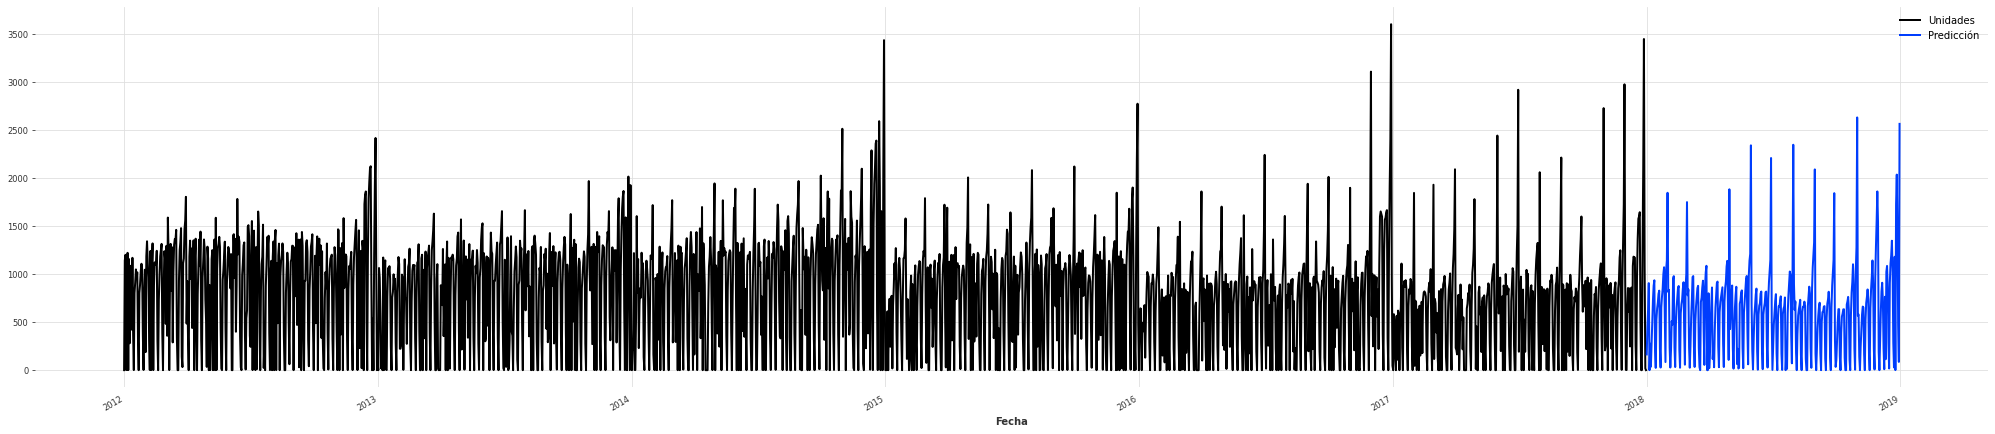

In [ ]:
fig, ax = plt.subplots(figsize=(35, 7))
darts_series_original.plot(ax=ax)
darts_series_prediction_2018.plot(ax=ax, label='Predicción')

**Exportar predicciones a Excel**

In [ ]:
df_prediction_2018.iloc[:181].to_excel('prediccion_2018_1s.xlsx')

## **Predicción del periodo 2012 - 2016**

**Predicción y postprocesado**

En este caso utilizamos el mismo modelo para predecir el 2017.

In [ ]:
prediction_2012_2016 = model_2017.predict(X_train_scaled_2017)

In [ ]:
# DataFrame solo con las unidades predichas por el modelo
df_prediction_2012_2016_unidades = pd.DataFrame(prediction_2012_2016, columns=['Unidades'])
df_prediction_2012_2016_unidades = df_prediction_2012_2016_unidades.applymap(negative_to_zero)

df_prediction_2012_2016 = pd.DataFrame(
    {
        "Fecha": df_original.iloc[0:1827]['Fecha'].tolist(),
        "Prediccion": df_prediction_2012_2016_unidades['Unidades'].tolist()
    }
)

darts_series_prediction_2012_2016 = TimeSeries.from_dataframe(df_prediction_2012_2016 , 'Fecha', 'Prediccion')

#DataFrame con las unidades predichas y su respectiva fecha como índice
df_prediction_2012_2016 = df_prediction_2012_2016.set_index('Fecha')

### **Resultados**

**Gráfica**

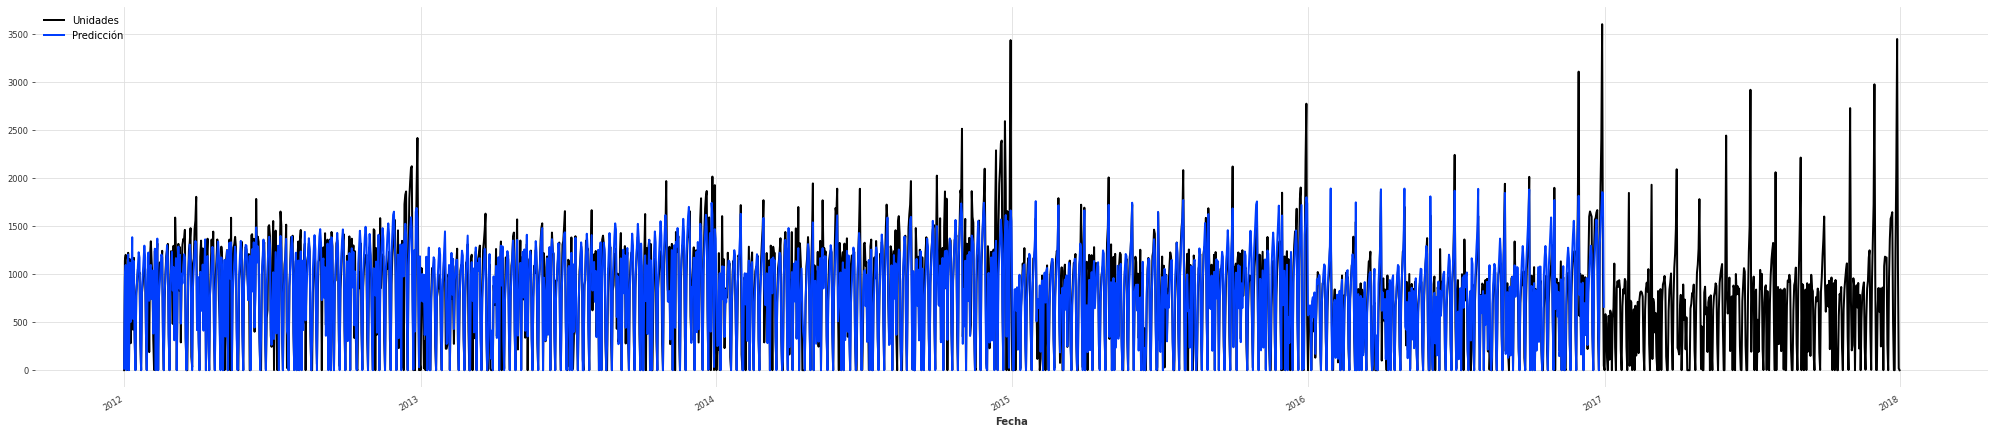

In [ ]:
fig, ax = plt.subplots(figsize=(35, 7))
darts_series_original.plot(ax=ax)
darts_series_prediction_2012_2016.plot(ax=ax, label='Predicción')

**Métricas**

In [ ]:
y_true = y_train_2017.tolist()
y_pred = df_prediction_2012_2016['Prediccion'].tolist()
r_squared_2012_2016 = r2_score(y_true = y_true, y_pred = y_pred)
rmse_2012_2016 = mean_squared_error(y_true = y_true, y_pred = y_pred, squared=False)

print(f"El R cuadrado para la predicción del periodo 2012 al 2016 es: {round(r_squared_2012_2016,2)*100} %")
print(f"El RMSE para la predicción del periodo 2012 al 2016 es: {round(rmse_2012_2016,2)} ")

El R cuadrado para la predicción del periodo 2012 al 2016 es: 79.0 %
El RMSE para la predicción del periodo 2012 al 2016 es: 250.85 


**Exportar predicciones a Excel**

In [ ]:
df_prediction_2012_2016.to_excel('prediccion_2012_2016.xlsx')